In [1]:
#Course:     DASC 8211 - Machine Learning
#Module 04:  Supervised Learning — k-Nearest Neighbor Classification
#More info:  https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#load the data from sklearn.datasets
data     = load_iris()

#divide the data into the input 'X' and the labels 'y'
X        = data['data'] #the observations
y        = data['target'] #the label


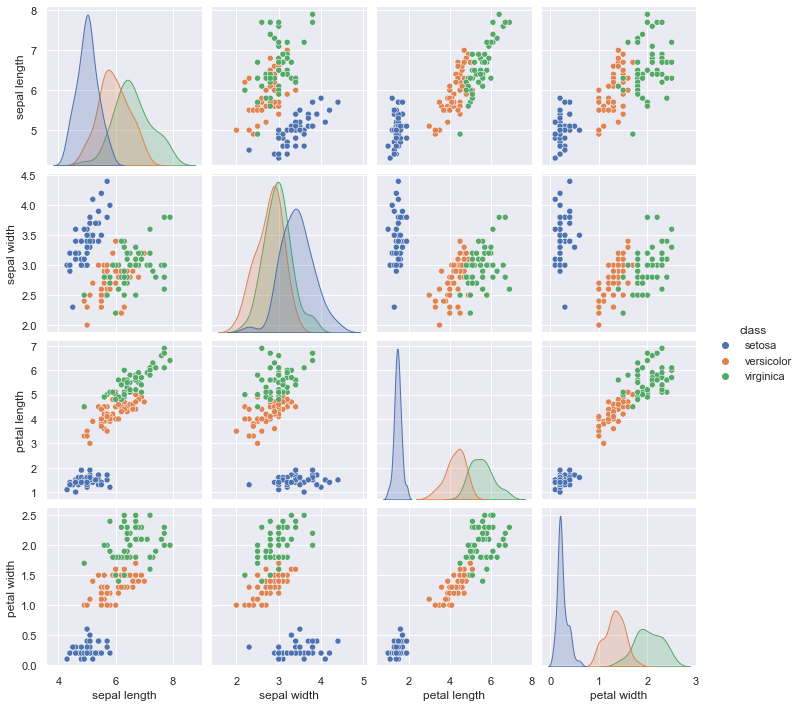

In [4]:
#load the data in a pandas dataframe
df          = pd.DataFrame(X, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
df['class'] = [data['target_names'][idx] for idx in y]


#Optional: lets visualize the pairwise relationships between the features

#create the pairplot using seaborn
sns.pairplot(df.dropna(), hue='class')
plt.show()

## Question 1: Choose *K*

Run the cell below to build a model of the iris dataset using the k-NN algorithm. The program will try different values of k and will evaluate the accuracy of the predictions. A line graph will display the accuracy for each value of k. Evaluate the results from the graph and recommend the best value of *k*.

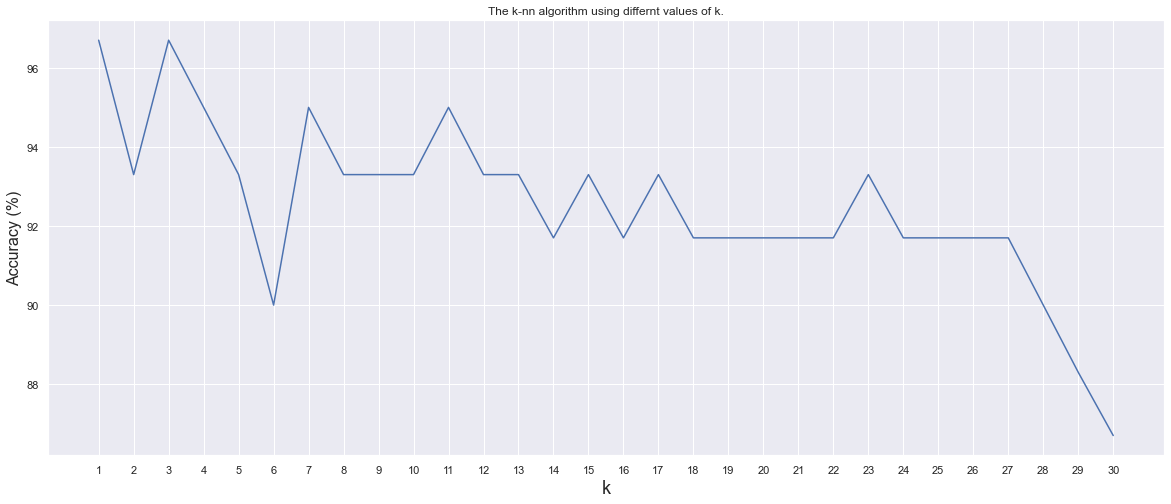

In [5]:
#split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    stratify=y, 
                                                    random_state=7) #random_state for reproducibility

#build the k-nn model using differnt values of k

k = 1        
accuracy = {}

while k < 31:
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(X_train, y_train) #train the model
    
    predictions      = knn.predict(X_test) #use the model to make predictions
    accuracy[str(k)] = round(accuracy_score(y_test, predictions), 3) * 100 #check the accuracy of the predictions using the test data
    
    k+=1

plt.rcParams['figure.figsize'] = (20,8)  
plt.title('The k-nn algorithm using differnt values of k.')
plt.plot(list(accuracy.keys()), list(accuracy.values()))
plt.xlabel('k', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=16)
plt.show()


## Question 2: Evaluate the Results
Input your recommendation for *k* in line 1 (in the cell below). Run the cell to view the classification report. Evaluate the accuracy of the results. Does the pair-plot above help to explain the level of accuracy for `versicolor` and `virginica` when compared with `setosa`?

In [9]:
k = 3 #replace 'None' with the value of k
if k:
    target_names = data['target_names']
    knn          = KNeighborsClassifier(n_neighbors = k) 

    knn.fit(X_train, y_train) #train the model
    y_pred = knn.predict(X_test) #check the prediction using the test set

    #y_train, y_test
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      0.95      0.95        20
   virginica       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

